In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows to make sure it loaded correctly
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Get a summary of the dataset's columns, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


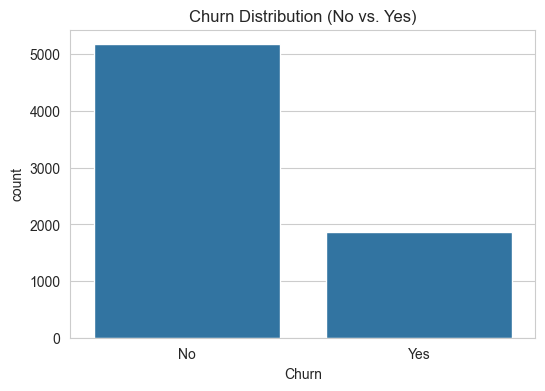

In [3]:
# Set the visual style of the plots
sns.set_style('whitegrid')

# Create a count plot for the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (No vs. Yes)')
plt.show()


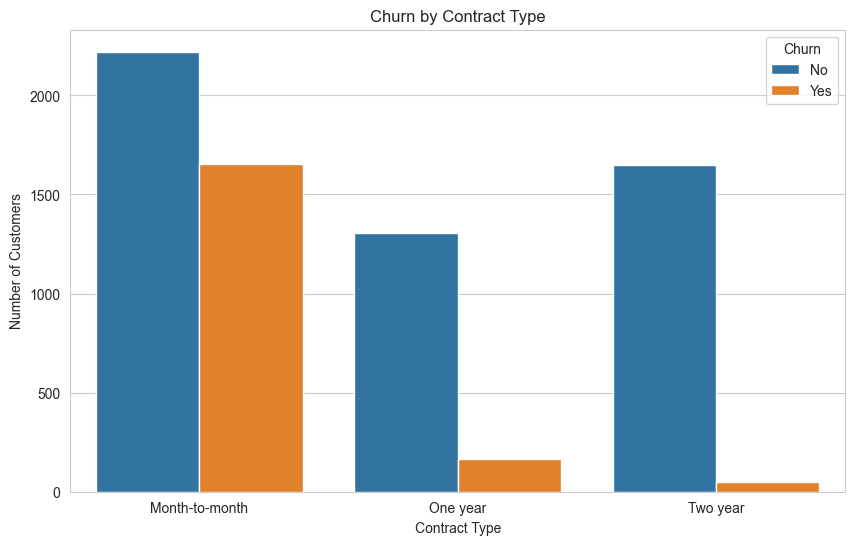

In [4]:
# Visualize churn by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

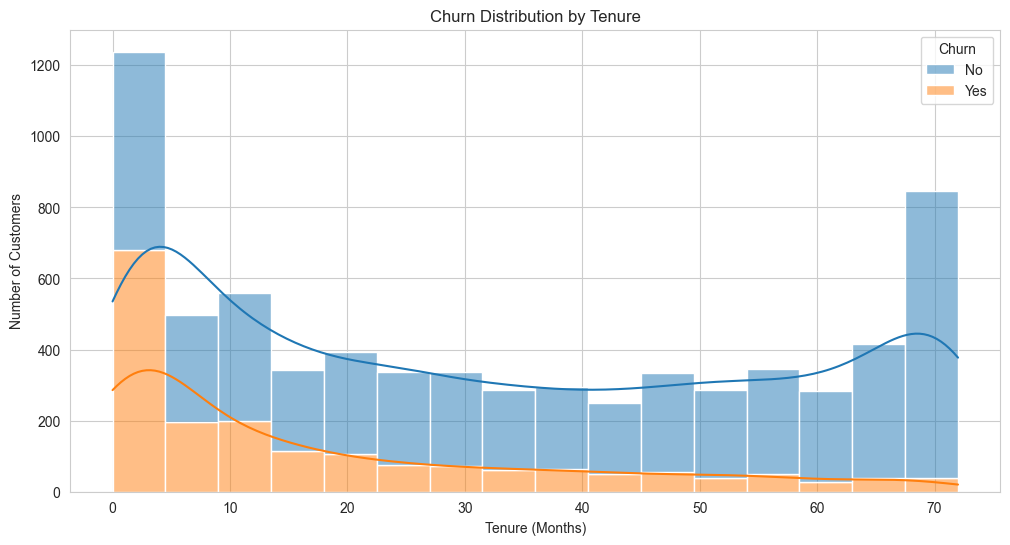

In [5]:
# Visualize churn by tenure
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

In [6]:
# Convert 'TotalCharges' to a numeric type. Errors will become NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop the few rows with missing values
df.dropna(inplace=True)

In [7]:
# Drop the customerID column as it is not a useful feature
df = df.drop('customerID', axis=1)

# Convert the 'Churn' column from Yes/No to 1/0
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert all other categorical columns into numeric dummy variables
df_dummies = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the new processed DataFrame
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [8]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the churn proportion is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Calculate the ratio for scale_pos_weight
# (Count of 'No Churn') / (Count of 'Churn') in the training set
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Calculated ratio for scale_pos_weight: {ratio}")

Calculated ratio for scale_pos_weight: 2.762541806020067


In [10]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Only transform the test data using the scaler fitted on the training data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and train the logistic regression model
# max_iter is set to a higher value to ensure the model converges
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Evaluate the model's performance
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [12]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report

# 1. Create the model instance
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', 
                                   eval_metric='logloss',
                                   use_label_encoder=False,
                                   random_state=42)

# 2. Define the 'grid' of parameters to test
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'scale_pos_weight': [ratio] # Use the ratio you calculated
}

# 3. Set up the grid search
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=3, # Using 3-fold CV for speed, 5 is also good
    scoring='f1', # Focus on optimizing the F1-score
    verbose=2, 
    n_jobs=-1 
)

print("Starting model tuning (this might take a few minutes)...")
# 4. Run the search
grid_search.fit(X_train, y_train)

# 5. Get the best model and its parameters
print(f"Best parameters found: {grid_search.best_params_}")

# --- THIS IS YOUR NEW, BETTER MODEL ---
best_xgb_model = grid_search.best_estimator_

# --- Evaluate your NEW model ---
print("\n--- NEW XGBoost (Tuned) Classification Report ---")
y_pred_new = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_new))

Starting model tuning (this might take a few minutes)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 2.762541806020067}

--- NEW XGBoost (Tuned) Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

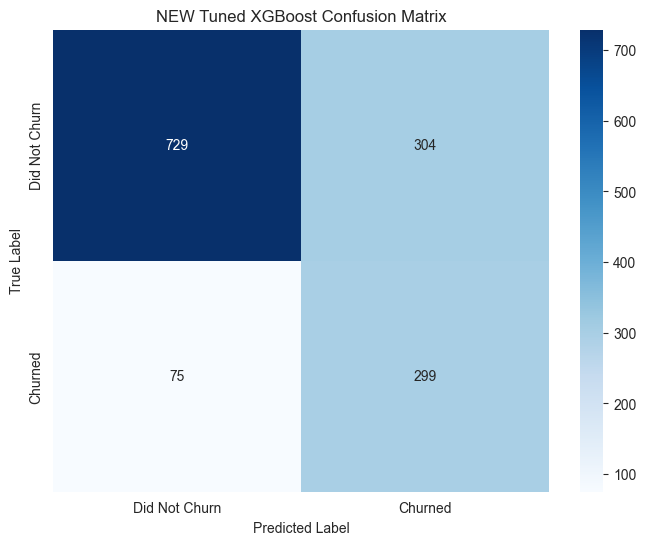

In [13]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix using the NEW predictions
cm = confusion_matrix(y_test, y_pred_new)  # <-- Use y_pred_new here

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Churn', 'Churned'], yticklabels=['Did Not Churn', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('NEW Tuned XGBoost Confusion Matrix') # <-- I updated the title too
plt.show()

XGBoost AUC Score: 0.8395


C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

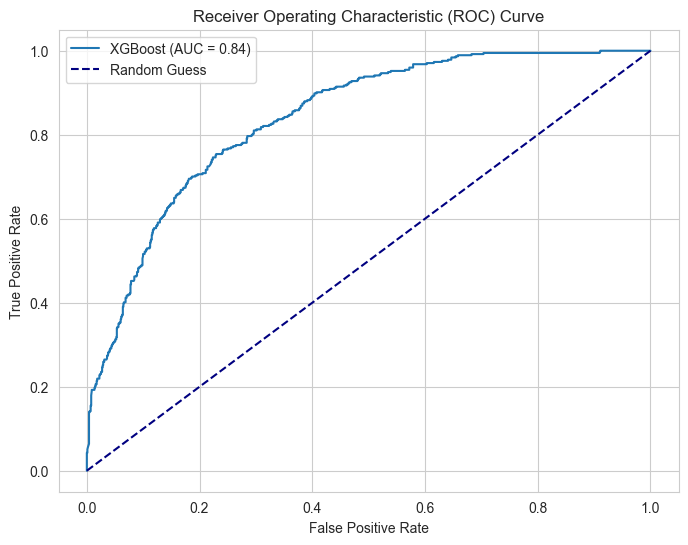

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Get prediction probabilities for both models
# Logistic Regression
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]
# Tuned XGBoost
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# 2. Calculate AUC scores for both
auc_log = roc_auc_score(y_test, y_pred_proba_log)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f'Logistic Regression AUC Score: {auc_log:.4f}')
print(f'Tuned XGBoost AUC Score: {auc_xgb:.4f}')

# 3. Calculate ROC curve points for both
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# 4. Plot both curves
fig, ax = plt.subplots(figsize=(10, 8)) # <-- Create a fig and ax
ax.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
ax.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {auc_xgb:.2f})', linewidth=2)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Comparison')
ax.legend()

# --- 5. SAVE THE FIGURE ---
# Use '../' to save it in your main project folder
fig.savefig('../roc_curve_comparison.png')
print("Saved ROC curve plot to roc_curve_comparison.png")

plt.show()

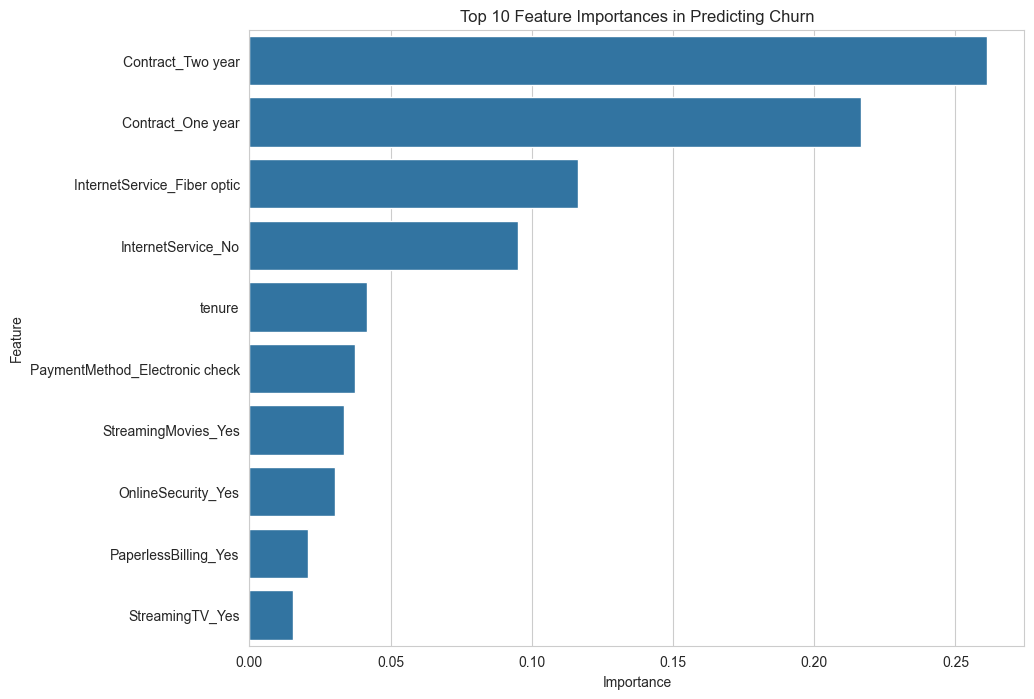

In [15]:
# Create a DataFrame for feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
   'Importance': best_xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Feature Importances in Predicting Churn')
plt.show()

Logistic Regression AUC Score: 0.8361
Tuned XGBoost AUC Score: 0.8395


C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

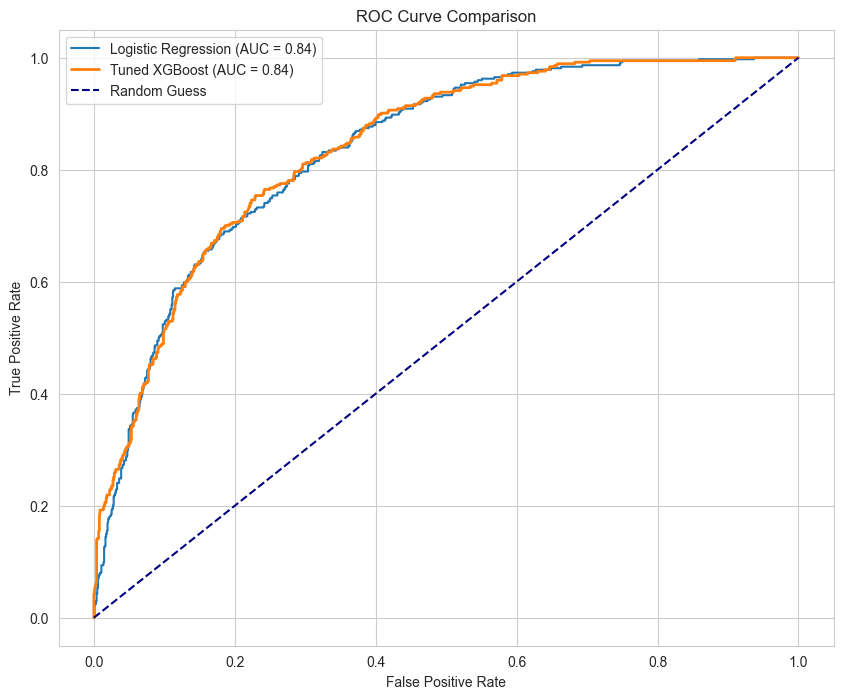

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Get prediction probabilities for both models
# Logistic Regression
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]
# Tuned XGBoost
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# 2. Calculate AUC scores for both
auc_log = roc_auc_score(y_test, y_pred_proba_log)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f'Logistic Regression AUC Score: {auc_log:.4f}')
print(f'Tuned XGBoost AUC Score: {auc_xgb:.4f}')

# 3. Calculate ROC curve points for both
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# 4. Plot both curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {auc_xgb:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [17]:
import joblib
import json
import shap

# --- 1. Save the NEW trained XGBoost model ---
joblib.dump(best_xgb_model, '../churn_model.pkl')

# --- 2. Save the Logistic Regression model (from earlier) ---
joblib.dump(log_model, '../log_model.pkl')

# --- 3. Save the fitted scaler (from earlier) ---
joblib.dump(scaler, '../scaler.pkl')

# --- 4. Save the list of feature columns ---
trained_columns = X_train.columns.tolist() 
with open('../trained_columns.json', 'w') as f:
    json.dump(trained_columns, f)

# --- 5. Create and save the NEW SHAP Explainer ---
explainer = shap.TreeExplainer(best_xgb_model)
joblib.dump(explainer, '../shap_explainer.pkl')

print("Success! All 5 new/updated asset files have been saved.")

Success! All 5 new/updated asset files have been saved.
